In [1]:
# verificar kernel utilizado
import sys
sys.executable

'/home/henrique/Documents/projects/facudade/ciencia-dos-dados/ciencia_de_dados_av1/.venv/bin/python'

In [2]:
# importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import Config
from src.data_processing import DataDict, ItemDict
import json
pd.set_option("display.width", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)


from IPython.display import display

## Organizar path para arquivos do enem 2023

In [3]:
# diretório dos dados
data_dirs = Config.get_path_dir_data()
# caminho para o arquivo csv da variáveis e suas categorias
path_dict = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]

# caminho para os microdados do enem 2023
path_microdados = data_dirs["DADOS"]["MICRODADOS_ENEM_2023.csv"]
# caminho para os itens das provas
path_itens = data_dirs["DADOS"]["ITENS_PROVA_2023.csv"]

# Caminho para o dicionário de variveis dos microdados
path_dict_microdados = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]
# Caminho para o dicionário de variveis dos microdados
path_dict_itens = data_dirs["DICIONÁRIO"]["ITENS_PROVA_2023.csv"]

## Caminho para diretório dos arquivos Parquet

In [4]:
dir_data = data_dirs["DADOS"]
dir_parquet_data = dir_data["MICRODADOS_ENEM_2023_parquet"]
path_parquet_file = dir_data["MICRODADOS_ENEM_2023.parquet"]

## Criar objeto dos dicionários e suas categorias 

In [5]:
dict_microdados = DataDict(path_dict_microdados)
dict_itens = ItemDict(path_dict_itens)

In [6]:
dict_itens.tabel

,Nome da variavel,Descricao,Variavel Categorica,Tamanho,Tipo
0,CO_POSICAO,Posição do Item na Prova,False,3,Numérica
1,SG_AREA,Área de Conhecimento do Item,True,2,Alfanumérica
2,CO_ITEM,Código do Item,False,5,Numérica
3,TX_GABARITO,Gabarito do Item¹,False,1,Alfanumérica
4,CO_HABILIDADE,Habilidade do Item,False,2,Numérica
5,IN_ITEM_ABAN,Indicador de item abandonado,True,1,Numérica
6,TX_MOTIVO_ABAN,Motivo para o abandono do item,False,40,Alfanumérica
7,NU_PARAM_A,Parâmetro de discriminação: é o poder de discriminação do item para diferenciar os participantes que dominam dos participantes que não dominam a habilidade avaliada.,False,9,Numérica
8,NU_PARAM_B,"Parâmetro de dificuldade: associado à dificuldade do item, sendo que quanto maior seu valor, mais difícil é o item.",False,9,Numérica
9,NU_PARAM_C,Parâmetro de acerto ao acaso: é a probabilidade de um participante acertar o item não dominando a habilidade exigida.,False,9,Numérica


In [7]:
dict_microdados.tabel

,Nome da variavel,Descricao,Variavel Categorica,Tamanho,Tipo
0,NU_INSCRICAO,Número de inscrição1,False,12,Numérica
1,NU_ANO,Ano do Enem,False,4,Numérica
2,TP_FAIXA_ETARIA,Faixa etária2,True,2,Numérica
3,TP_SEXO,Sexo,True,1,Alfanumérica
4,TP_ESTADO_CIVIL,Estado Civil,True,1,Numérica
...,...,...,...,...,...
76,Q021,Na sua residência tem TV por assinatura?,True,1,Alfanumérica
77,Q022,Na sua residência tem telefone celular?,True,1,Alfanumérica
78,Q023,Na sua residência tem telefone fixo?,True,1,Alfanumérica
79,Q024,Na sua residência tem computador?,True,1,Alfanumérica


## Data Frames

In [6]:
df = pd.read_parquet(path_parquet_file)

## Perguntas

### **"Como está distribuída a nota da prova de matemática? Há valores atípicos que se destacam?"**

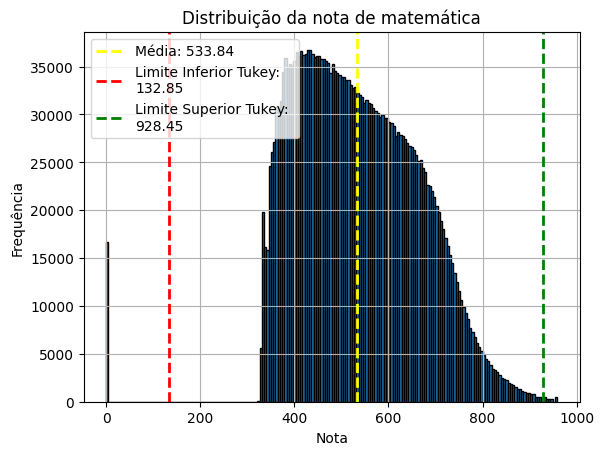

In [9]:
# usando histogramas

# Calcular Q1, Q3 e IQR
Q1 = df['NU_NOTA_MT'].quantile(0.25)
Q3 = df['NU_NOTA_MT'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df['NU_NOTA_MT'].hist(bins=200, edgecolor='black')


mean = np.mean(df["NU_NOTA_MT"])

plt.axvline(mean, color="yellow", linestyle='dashed', linewidth=2, label=f"Média: {mean:.2f}")
plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label=f'Limite Inferior Tukey: \n{limite_inferior:.2f}')
plt.axvline(limite_superior, color='green', linestyle='dashed', linewidth=2, label=f'Limite Superior Tukey: \n{limite_superior:.2f}')



plt.title('Distribuição da nota de matemática')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.legend()
plt.show()

De primeira vista, sem tratar os dados de nenuma forma, apenas evitando dados descritos como not a number, vimos que a dsitribuição se assemelha a uma distribuição normal, onde a média está concentrada no centro da distribuição. No entando, é necessário observar que as notas 0 execessivas muito provavelmente indica as pessoas que não compareceram ou zeraram de outra maneira. Removendo essas notas, a distribuiçã e suas medidas ficam assim:

In [10]:
no_zeros = df[df["NU_NOTA_MT"] > 0]["NU_NOTA_MT"]

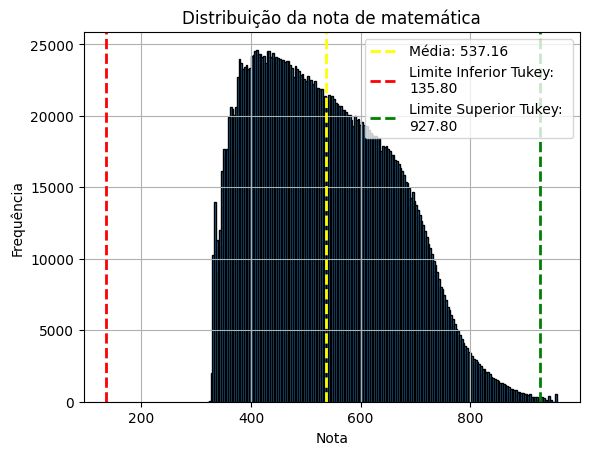

In [11]:
Q1 = no_zeros.quantile(0.25)
Q3 = no_zeros.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

no_zeros.hist(bins=200, edgecolor='black')


mean = np.mean(no_zeros)

plt.axvline(mean, color="yellow", linestyle='dashed', linewidth=2, label=f"Média: {mean:.2f}")
plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label=f'Limite Inferior Tukey: \n{limite_inferior:.2f}')
plt.axvline(limite_superior, color='green', linestyle='dashed', linewidth=2, label=f'Limite Superior Tukey: \n{limite_superior:.2f}')


plt.title('Distribuição da nota de matemática')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.legend()
plt.show()

Nota-se que as medidas de média e limites estabelecidos pela cerca de Tukey não mudaram visualmente, mas aumentaram quando observados na legenda, enquanto que o limite superior diminuiu. Se tornou mais visível como os dados se comportam como uma distribuição normal, com cauda para direita, indicando como a maioria dos dados se concentramao redor da média, com poucos conseguindo atravessar os limites estabelecidos pela cerda de tukey. 

### **"O fato de realizar a prova em um município diferente daquele onde o candidato estuda afeta sua nota em matemática?"**

In [12]:
df_filtered = df[df["NO_MUNICIPIO_ESC"].notna() & df["NO_MUNICIPIO_PROVA"].notna()]

engual = df_filtered[df_filtered["NO_MUNICIPIO_ESC"] == df_filtered["NO_MUNICIPIO_PROVA"]]
dif = df_filtered[df_filtered["NO_MUNICIPIO_ESC"] != df_filtered["NO_MUNICIPIO_PROVA"]]

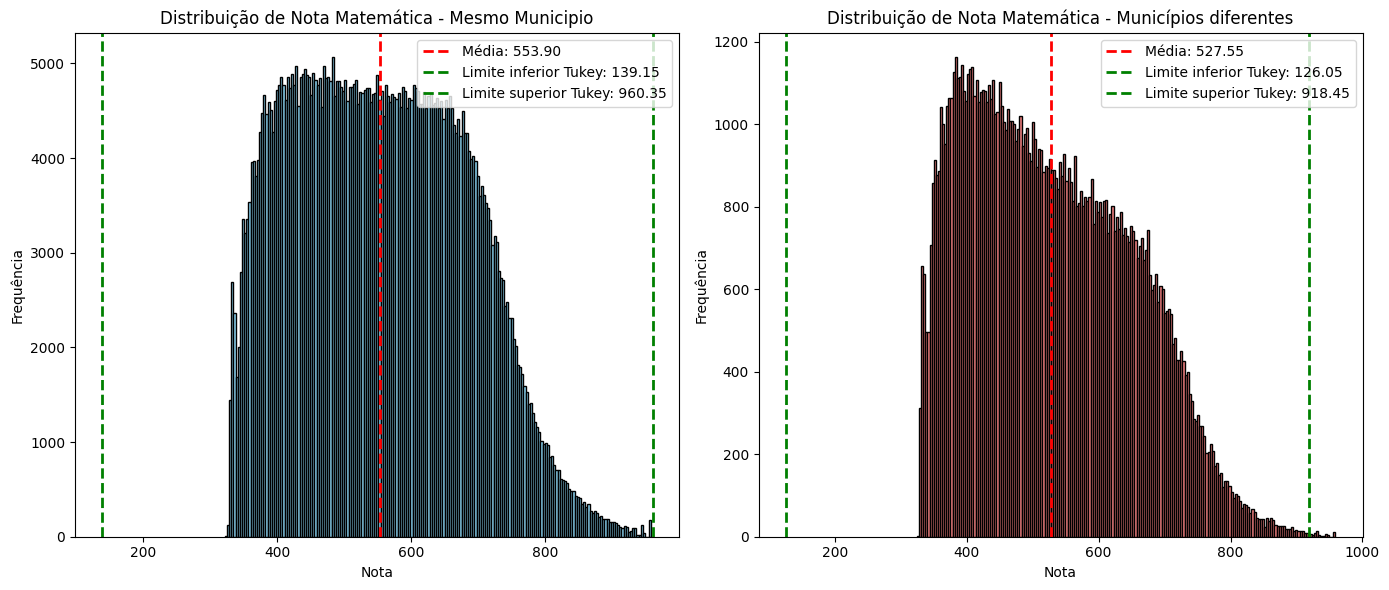

In [13]:
nota_mat_engual = engual[engual["NU_NOTA_MT"] > 0]["NU_NOTA_MT"]
nota_mat_dif = dif[dif["NU_NOTA_MT"] > 0]["NU_NOTA_MT"]

def tukey_limits(data: pd.DataFrame):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    mean_value = np.mean(data)
    return lower_limit, upper_limit, mean_value

# Calculando limites de Tukey e médias
lower_limit_engual, upper_limit_engual, mean_engual = tukey_limits(nota_mat_engual)
lower_limit_dif, upper_limit_dif, mean_dif = tukey_limits(nota_mat_dif)

# Criando a grid 1x2 de gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].hist(nota_mat_engual, bins=200, edgecolor='black', color='skyblue')
axes[0].axvline(mean_engual, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean_engual:.2f}')
axes[0].axvline(lower_limit_engual, color='green', linestyle='dashed', linewidth=2, label=f'Limite inferior Tukey: {lower_limit_engual:.2f}')
axes[0].axvline(upper_limit_engual, color='green', linestyle='dashed', linewidth=2, label=f'Limite superior Tukey: {upper_limit_engual:.2f}')
axes[0].set_title('Distribuição de Nota Matemática - Mesmo Municipio')
axes[0].set_xlabel('Nota')
axes[0].set_ylabel('Frequência')
axes[0].legend()


axes[1].hist(nota_mat_dif, bins=200, edgecolor='black', color='lightcoral')
axes[1].axvline(mean_dif, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean_dif:.2f}')
axes[1].axvline(lower_limit_dif, color='green', linestyle='dashed', linewidth=2, label=f'Limite inferior Tukey: {lower_limit_dif:.2f}')
axes[1].axvline(upper_limit_dif, color='green', linestyle='dashed', linewidth=2, label=f'Limite superior Tukey: {upper_limit_dif:.2f}')
axes[1].set_title('Distribuição de Nota Matemática - Municípios diferentes')
axes[1].set_xlabel('Nota')
axes[1].set_ylabel('Frequência')
axes[1].legend()

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()

Podemos ver que o conjunto de nots na prova de matemática do conjuto de participantes que realizou a prova no mesmo municipio que estuda é bem diferente do conjunto que realizou a prova em um município diferente. Ambos se comportam como uma distribuição normal, aepnas com uma cauda para direita, como no gráfico da questão antrerior. No entanto, para o conjunto que realizou a prova no municipio diferente, há uma acentuada a partir da linha que demarca a média, mostrando como os dados estão concentrados abaixo dela. Já o conjunto que realizou a prova no mesmo municipio que estudou, as notas se distribuem de uma forma mais cimétrica, quando divididos pela média.

Al´m da forma como os gráficos aparentam, as próprias medidas retiradas dos dados indicam como o primeiro grupo de candidadtos teve um desenpenho concideravelmente melhor que o segundo, mostrando como o fato de realizar o prova no município que estudou afeta a nota.

### **"Qual das competências avaliadas na prova de redação apresentou maior nível de dificuldade para os candidatos?"**

In [7]:
# vizualizar as competencias
comp = "NU_NOTA_COMP"
competencias = [comp + str(i) for i in range(1,6)]
tabela = dict_microdados.tabel 
(tabela[tabela["Nome da variavel"].isin(competencias)])

,Nome da variavel,Descricao,Variavel Categorica,Tamanho,Tipo
49,NU_NOTA_COMP1,Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.,False,9,Numérica
50,NU_NOTA_COMP2,"Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.",False,9,Numérica
51,NU_NOTA_COMP3,"Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.",False,9,Numérica
52,NU_NOTA_COMP4,Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.,False,9,Numérica
53,NU_NOTA_COMP5,"Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.",False,9,Numérica


**Carregar dataframe apenas com as colunas necessárias**

In [8]:
df_group = df[competencias]
df_group = df_group.dropna(subset=competencias)
df_group_long = df_group.melt(var_name="Competencia", value_name="Nota")

In [9]:
df_group

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
2,140.0,200.0,100.0,120.0,140.0
3,140.0,200.0,160.0,180.0,200.0
4,120.0,120.0,120.0,120.0,80.0
9,120.0,120.0,120.0,120.0,120.0
10,140.0,200.0,160.0,160.0,200.0
...,...,...,...,...,...
3933946,120.0,120.0,100.0,100.0,60.0
3933948,120.0,160.0,80.0,120.0,120.0
3933950,120.0,120.0,120.0,100.0,80.0
3933951,140.0,120.0,120.0,140.0,120.0


**gerar histogramas para vizualizar as distribuições das notas em cada comptencia**

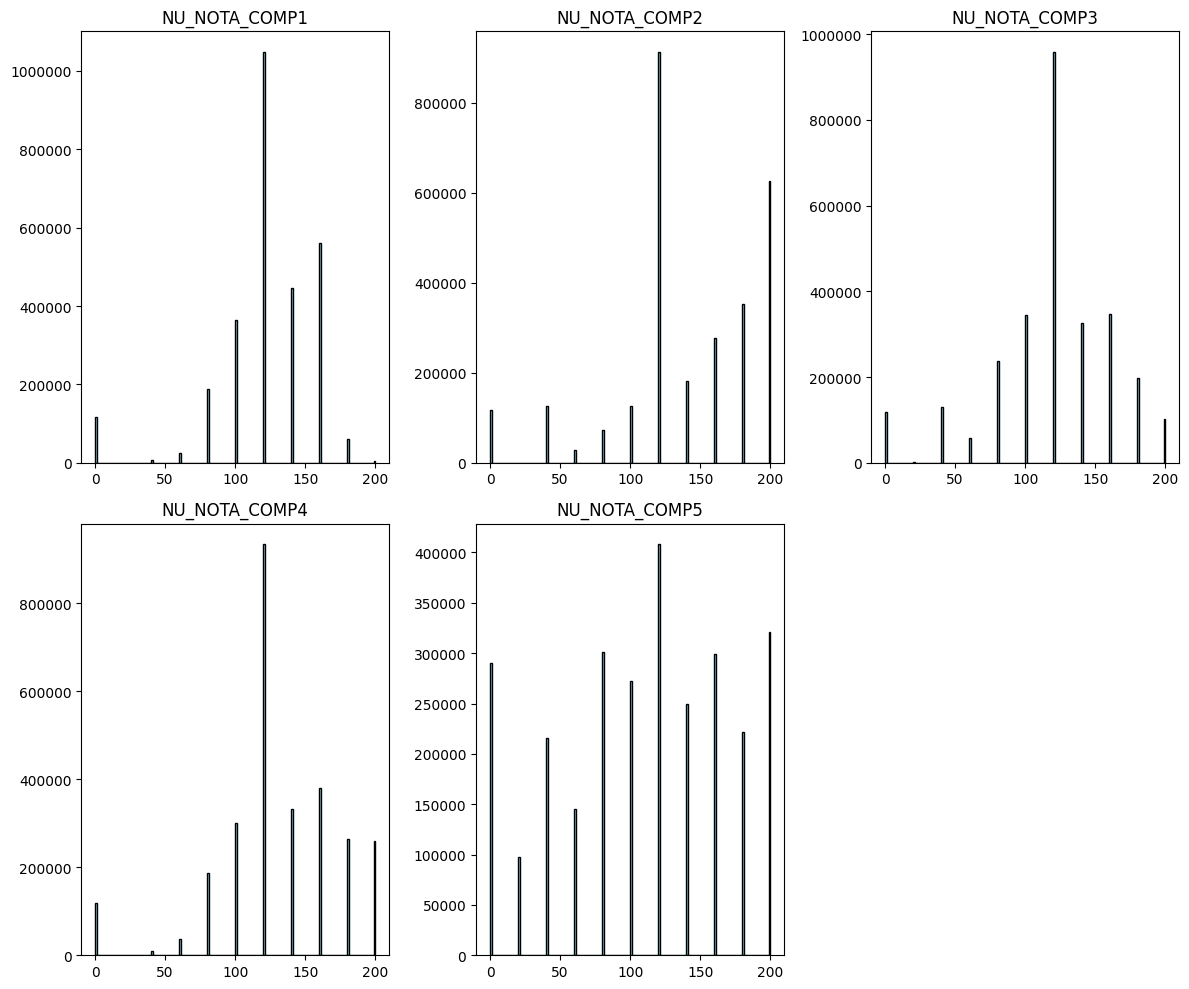

In [10]:
from matplotlib.ticker import ScalarFormatter

dict_comp = {comp : df_group[comp] for comp in competencias}

fig, axs = plt.subplots(2, 3, figsize=(12, 10))

axs = axs.ravel()

formatter = ScalarFormatter()
formatter.set_scientific(False)

for i, comp in enumerate(competencias):
    axs[i].hist(dict_comp[comp], bins=200, color="skyblue", edgecolor ="black")
    axs[i].set_title(comp)
    axs[i].yaxis.set_major_formatter(formatter)

fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

**gerar box plot para visualizar outliers**

/tmp/ipykernel_72970/1056695501.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dados, labels=competencias, patch_artist=True)


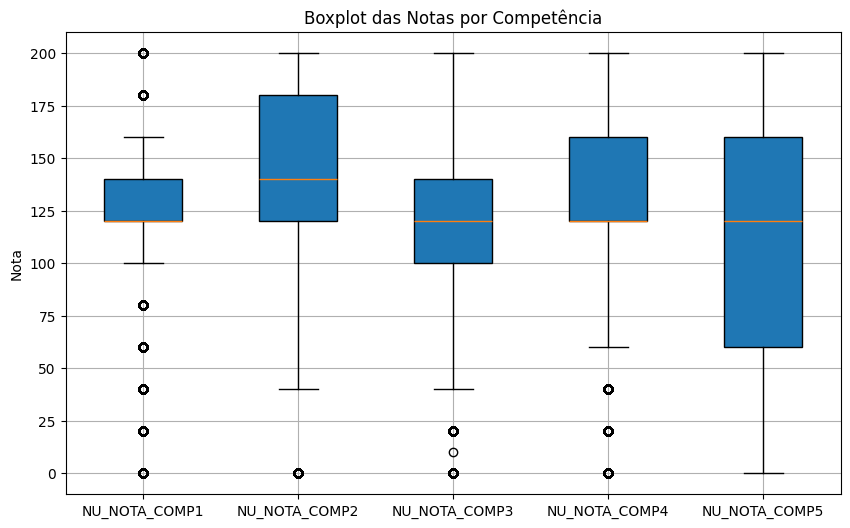

In [11]:
dados = [df_group[comp].dropna() for comp in competencias]

# Plotando
plt.figure(figsize=(10, 6))
plt.boxplot(dados, labels=competencias, patch_artist=True)

plt.title("Boxplot das Notas por Competência")
plt.ylabel("Nota")
plt.grid(True)
plt.show()

**Medidas estatisticas**

In [13]:
def get_statistic(lista):
    mean = np.mean(lista)
    median = np.median(lista)
    std = np.std(lista)
    q1, q2, q3 = np.quantile(lista, [0.25, 0.5, 0.75])
    
    return [mean, median, std, q1, q2, q3]

dic_statistics = {key : get_statistic(value) for key, value in dict_comp.items()}

In [14]:
stat_names = ["Média", "Mediana", "Desvio Padrão", "Q1", "Q2", "Q3"]

# Criar DataFrame a partir do dicionário
df_stats = pd.DataFrame(dic_statistics, index=stat_names)

# Transpor (opcional: fica com as competências nas linhas)
df_stats = df_stats.T

In [ ]:
df_stats

,Média,Mediana,Desvio Padrão,Q1,Q2,Q3
NU_NOTA_COMP1,121.545183,120.0,35.654431,120.0,120.0,140.0
NU_NOTA_COMP2,139.295228,140.0,51.615616,120.0,140.0,180.0
NU_NOTA_COMP3,118.509046,120.0,43.408277,100.0,120.0,140.0
NU_NOTA_COMP4,129.797016,120.0,43.773248,120.0,120.0,160.0
NU_NOTA_COMP5,108.651997,120.0,61.602472,60.0,120.0,160.0


<Figure size 1200x900 with 0 Axes>

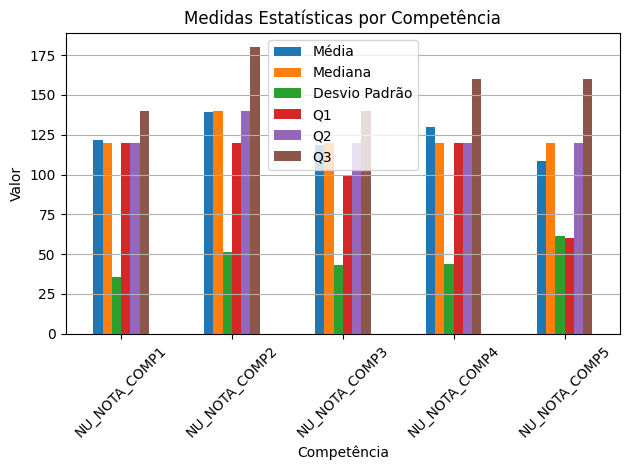

In [17]:
plt.figure(figsize=(12, 9))
df_stats.plot(kind='bar')
plt.title("Medidas Estatísticas por Competência")
plt.ylabel("Valor")
plt.xlabel("Competência")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **"Existe uma relação entre a renda familiar dos candidatos e sua nota em matemática?"**

In [22]:
variaveis = ["Q006", "NU_NOTA_MT"]
df_group = df[variaveis].dropna()

In [24]:
# Visualizar variáveis
tabela = dict_microdados.tabel 
tabela[tabela["Nome da variavel"].isin(variaveis)]

,Nome da variavel,Descricao,Variavel Categorica,Tamanho,Tipo
37,NU_NOTA_MT,Nota da prova de Matemática,False,9,Numérica
61,Q006,Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.),True,1,Alfanumérica


In [30]:
# caterorias de Q006
dict_q6_categoris = {key: value for key, value in zip(dict_microdados.legenda["Q006"]["categoria"], dict_microdados.legenda["Q006"]["descricao"])}
categoris = list(dict_q6_categoris.keys())
dict_microdados.legenda["Q006"]

,categoria,descricao
0,A,Nenhuma Renda
1,B,"Até R$ 1.320,00"
2,C,"De R$ 1.320,01 até R$ 1.980,00."
3,D,"De R$ 1.980,01 até R$ 2.640,00."
4,E,"De R$ 2.640,01 até R$ 3.300,00."
5,F,"De R$ 3.300,01 até R$ 3.960,00."
6,G,"De R$ 3.960,01 até R$ 5.280,00."
7,H,"De R$ 5.280,01 até R$ 6.600,00."
8,I,"De R$ 6.600,01 até R$ 7.920,00."
9,J,"De R$ 7.920,01 até R$ 9240,00."


In [31]:
dict_mat_per_categori = {categori : df_group[df_group["Q006"] == categori]["NU_NOTA_MT"] for categori in categoris}

IndexError: index 5 is out of bounds for axis 0 with size 5

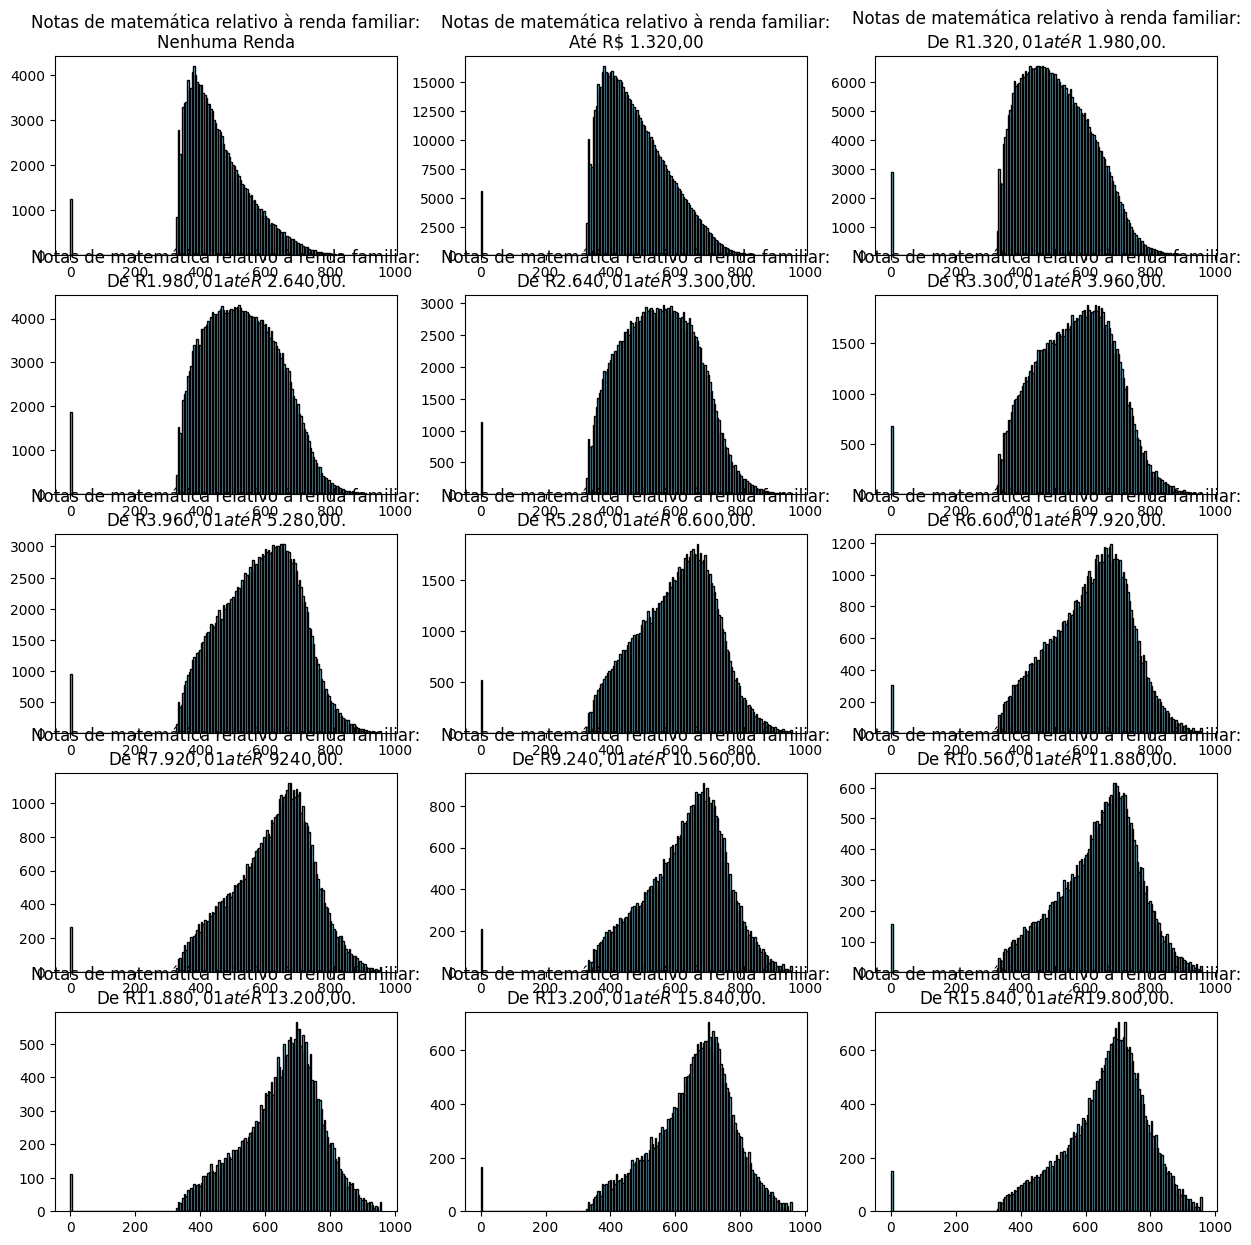

In [ ]:
fig, axes = plt.subplots(5,3, figsize=(15,15))

for i, algo in enumerate(dict_mat_per_categori.items()):
    key, df_key = algo
    x, y = i // 5, i%3
    value = dict_q6_categoris[key]
    axes[x, y].hist(df_key, bins=200, color="skyblue", edgecolor="black")
    axes[x, y].set_title(f"Notas de matemática relativo a renda familiar:\n{value}")

### **"Ter computador ou acesso a internet na residência impacta na nota em matemática?"**

In [18]:
c_internet_c_computador = df[(df["Q025"] == 'B') & (df["Q024"] != 'A') & (df["NU_NOTA_MT"] > 0)]["NU_NOTA_MT"]
n_internet_c_computador = df[(df["Q025"] == 'A') & (df["Q024"] != 'A') & (df["NU_NOTA_MT"] > 0)]["NU_NOTA_MT"]
c_internet_n_computador = df[(df["Q025"] == 'B') & (df["Q024"] == 'A') & (df["NU_NOTA_MT"] > 0)]["NU_NOTA_MT"]
n_internet_n_computador = df[(df["Q025"] == 'A') & (df["Q024"] == 'A') & (df["NU_NOTA_MT"] > 0)]["NU_NOTA_MT"]

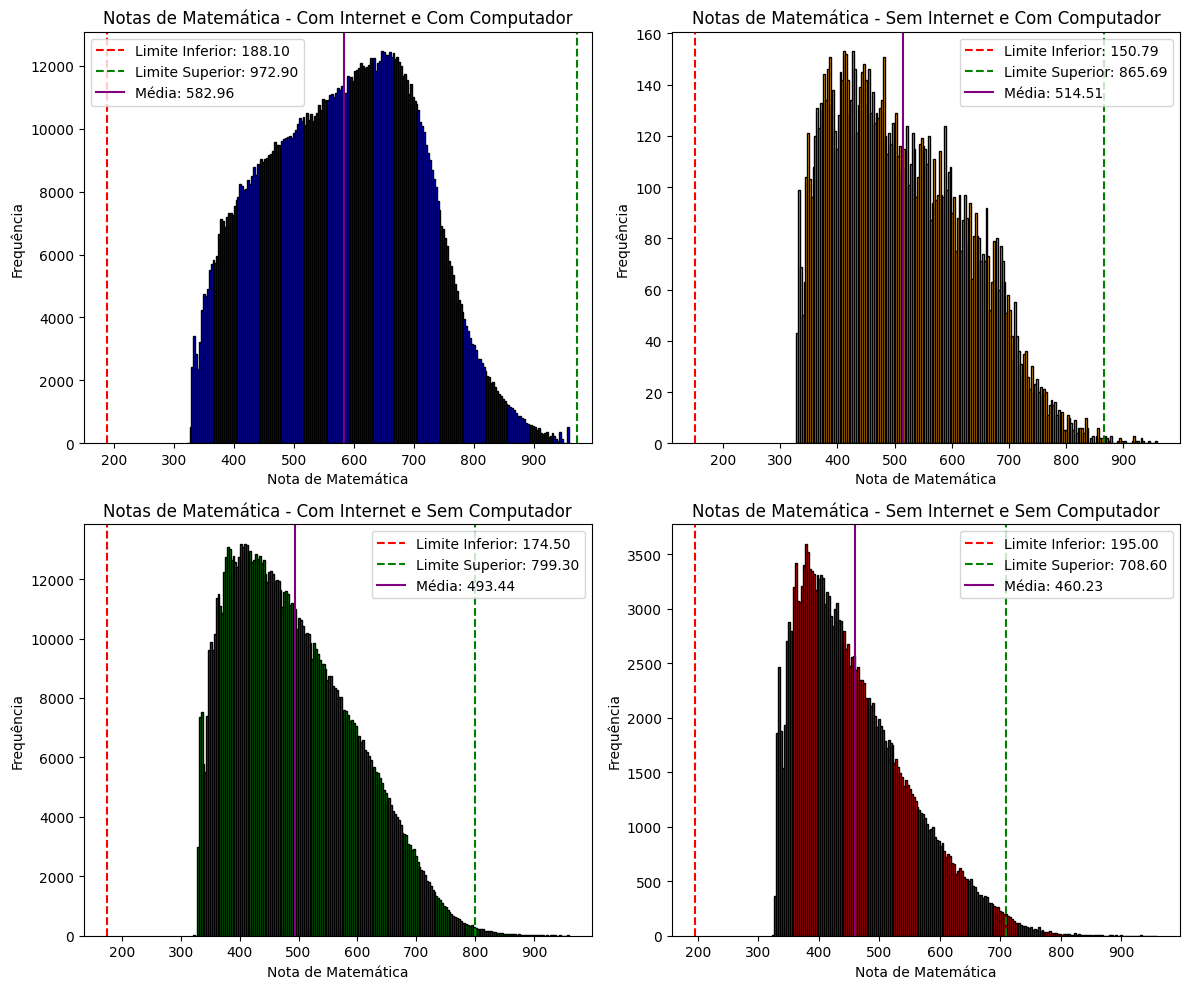

In [19]:
# Função para calcular os limites da cerca de Tukey
def tukey_limits(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

# Remover NaN dos DataFrames
c_internet_c_computador = c_internet_c_computador.dropna()
n_internet_c_computador = n_internet_c_computador.dropna()
c_internet_n_computador = c_internet_n_computador.dropna()
n_internet_n_computador = n_internet_n_computador.dropna()

# Plotando as distribuições
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: c_internet_c_computador
axes[0, 0].hist(c_internet_c_computador, bins=200, edgecolor='black', color='blue')
lower_limit, upper_limit = tukey_limits(c_internet_c_computador)
mean_value = c_internet_c_computador.mean()
axes[0, 0].axvline(lower_limit, color='red', linestyle='dashed', label=f'Limite Inferior: {lower_limit:.2f}')
axes[0, 0].axvline(upper_limit, color='green', linestyle='dashed', label=f'Limite Superior: {upper_limit:.2f}')
axes[0, 0].axvline(mean_value, color='purple', linestyle='solid', label=f'Média: {mean_value:.2f}')
axes[0, 0].set_title('Notas de Matemática - Com Internet e Com Computador')
axes[0, 0].set_xlabel('Nota de Matemática')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].legend()

# Plot 2: n_internet_c_computador
axes[0, 1].hist(n_internet_c_computador, bins=200, edgecolor='black', color='orange')
lower_limit, upper_limit = tukey_limits(n_internet_c_computador)
mean_value = n_internet_c_computador.mean()
axes[0, 1].axvline(lower_limit, color='red', linestyle='dashed', label=f'Limite Inferior: {lower_limit:.2f}')
axes[0, 1].axvline(upper_limit, color='green', linestyle='dashed', label=f'Limite Superior: {upper_limit:.2f}')
axes[0, 1].axvline(mean_value, color='purple', linestyle='solid', label=f'Média: {mean_value:.2f}')
axes[0, 1].set_title('Notas de Matemática - Sem Internet e Com Computador')
axes[0, 1].set_xlabel('Nota de Matemática')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].legend()

# Plot 3: c_internet_n_computador
axes[1, 0].hist(c_internet_n_computador, bins=200, edgecolor='black', color='green')
lower_limit, upper_limit = tukey_limits(c_internet_n_computador)
mean_value = c_internet_n_computador.mean()
axes[1, 0].axvline(lower_limit, color='red', linestyle='dashed', label=f'Limite Inferior: {lower_limit:.2f}')
axes[1, 0].axvline(upper_limit, color='green', linestyle='dashed', label=f'Limite Superior: {upper_limit:.2f}')
axes[1, 0].axvline(mean_value, color='purple', linestyle='solid', label=f'Média: {mean_value:.2f}')
axes[1, 0].set_title('Notas de Matemática - Com Internet e Sem Computador')
axes[1, 0].set_xlabel('Nota de Matemática')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].legend()

# Plot 4: n_internet_n_computador
axes[1, 1].hist(n_internet_n_computador, bins=200, edgecolor='black', color='red')
lower_limit, upper_limit = tukey_limits(n_internet_n_computador)
mean_value = n_internet_n_computador.mean()
axes[1, 1].axvline(lower_limit, color='red', linestyle='dashed', label=f'Limite Inferior: {lower_limit:.2f}')
axes[1, 1].axvline(upper_limit, color='green', linestyle='dashed', label=f'Limite Superior: {upper_limit:.2f}')
axes[1, 1].axvline(mean_value, color='purple', linestyle='solid', label=f'Média: {mean_value:.2f}')
axes[1, 1].set_title('Notas de Matemática - Sem Internet e Sem Computador')
axes[1, 1].set_xlabel('Nota de Matemática')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].legend()

# Ajustando layout
plt.tight_layout()
plt.show()


Para essa questão foi feito uma combinação entre os fatores "Possui internet?" e "Possui computador?", assim, gerando quatro conjuntos de dados separados, com um gráfico para cada. Logo de cara, vemos como o grupo com internet e computador possui um desempenho muito maior que os outros, com uma média de 582, com os dados concentrados acima da média. 

Enquanto isso, diametralmente oposto, os candidatos sem acesso a internet ou computador, tiveram um desempenho consideravelmente pior, com uma média igual a 460.23, com as notas se concentrando abaixo dessa média. Isso é um decrécimo de aproximadamente 21% em relação ao grupo com acesso a ambos internete e computador.

Não só isso, mas para o grupo sem acesso a nenhum dos dois, para um candidato ser considerado um 'outlier' denbtro dos parâmetros estabelecidos pela cerca de tukey, precisa ter nota acima de 708.60, apenas 17% superior a média do grupo com acesso a ambos.

### **"Qual a influência da situação de conclusão do ensino médio (TP_ST_CONCLUSAO) sobre a nota de matemática, levando em conta o gênero do candidato?"**

In [20]:
# visualizar categorias dos dados relevantes 
TP_ST_CONCLUSAO = dict_microdados.legenda["TP_ST_CONCLUSAO"]
dict_microdados.legenda["TP_ST_CONCLUSAO"]

,categoria,descricao
0,1,Já concluí o Ensino Médio
1,2,Estou cursando e concluirei o Ensino Médio em 2023
2,3,Estou cursando e concluirei o Ensino Médio após 2023
3,4,Não concluí e não estou cursando o Ensino Médio


In [ ]:
TP_SEXO = dict_microdados.legenda["TP_SEXO"]
dict_microdados.legenda["TP_SEXO"]

,categoria,descricao
0,M,Masculino
1,F,Feminino


: 

In [ ]:
coloum = ["TP_ST_CONCLUSAO", "TP_SEXO", "NU_NOTA_MT"]
df_group = df.dropna(subset=coloum)[coloum]
df_group = df_group[df_group["NU_NOTA_MT"] > 0][coloum]

In [ ]:
# combinação de conclusao do ensino médio com sexo masculino
category_comb_m = [(int(categoria), "M") for categoria in TP_ST_CONCLUSAO["categoria"]]
# combinação de conclusao do ensino médio com sexo feminino
category_comb_f = [(int(categoria), "F") for categoria in TP_ST_CONCLUSAO["categoria"]]


# dicionário de dfs da conclusao do ensino médio com sexo masculino
dict_m = {f"{comb[0]}_{comb[1]}": df_group[(df_group["TP_ST_CONCLUSAO"] == comb[0]) & (df_group["TP_SEXO"] == "M")]["NU_NOTA_MT"] for comb in category_comb_m}
dict_f = {f"{comb[0]}_{comb[1]}": df_group[(df_group["TP_ST_CONCLUSAO"] == comb[0]) & (df_group["TP_SEXO"] == "F")]["NU_NOTA_MT"] for comb in category_comb_f}

In [ ]:
def tukey_limits(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

In [ ]:
# Plotando histograma
def plot_hist(category_comb, dict_):
    colors = ["blue", "orange", "green", "red"]
    func = lambda x: f"{x[0]}_{x[1]}"

    fig, axes = plt.subplots(2, 2, figsize=(15, 13))

    for i, pack in enumerate(zip(category_comb, colors)):
        categori, color = pack
        values = dict_[func(categori)]
        x, y = i%2, i//2

        axes[x, y].hist(values,bins=200, color=color, edgecolor='black')
        lower_limit, upper_limit = tukey_limits(values)
        mean = np.mean(values)
        axes[x, y].axvline(lower_limit, color="red", linestyle='dashed', label = f"Limite Inferior: {lower_limit:.2f}")
        axes[x, y].axvline(mean, color="purple", linestyle='solid', label = f"Média: {mean:.2f}")
        axes[x, y].axvline(upper_limit, color="green", linestyle='dashed', label = f"Limite Superior: {upper_limit:.2f}")

        axes[x, y].set_title(f"Notas de matemática\n{TP_ST_CONCLUSAO[TP_ST_CONCLUSAO["categoria"] == str(categori[0])]["descricao"].unique()[0]} - {TP_SEXO[TP_SEXO["categoria"] == categori[1]]["descricao"].unique()[0]}")
        axes[x, y].set_xlabel("Notas Matemática")
        axes[x, y].set_ylabel("Frequência")
        axes[x, y].legend()


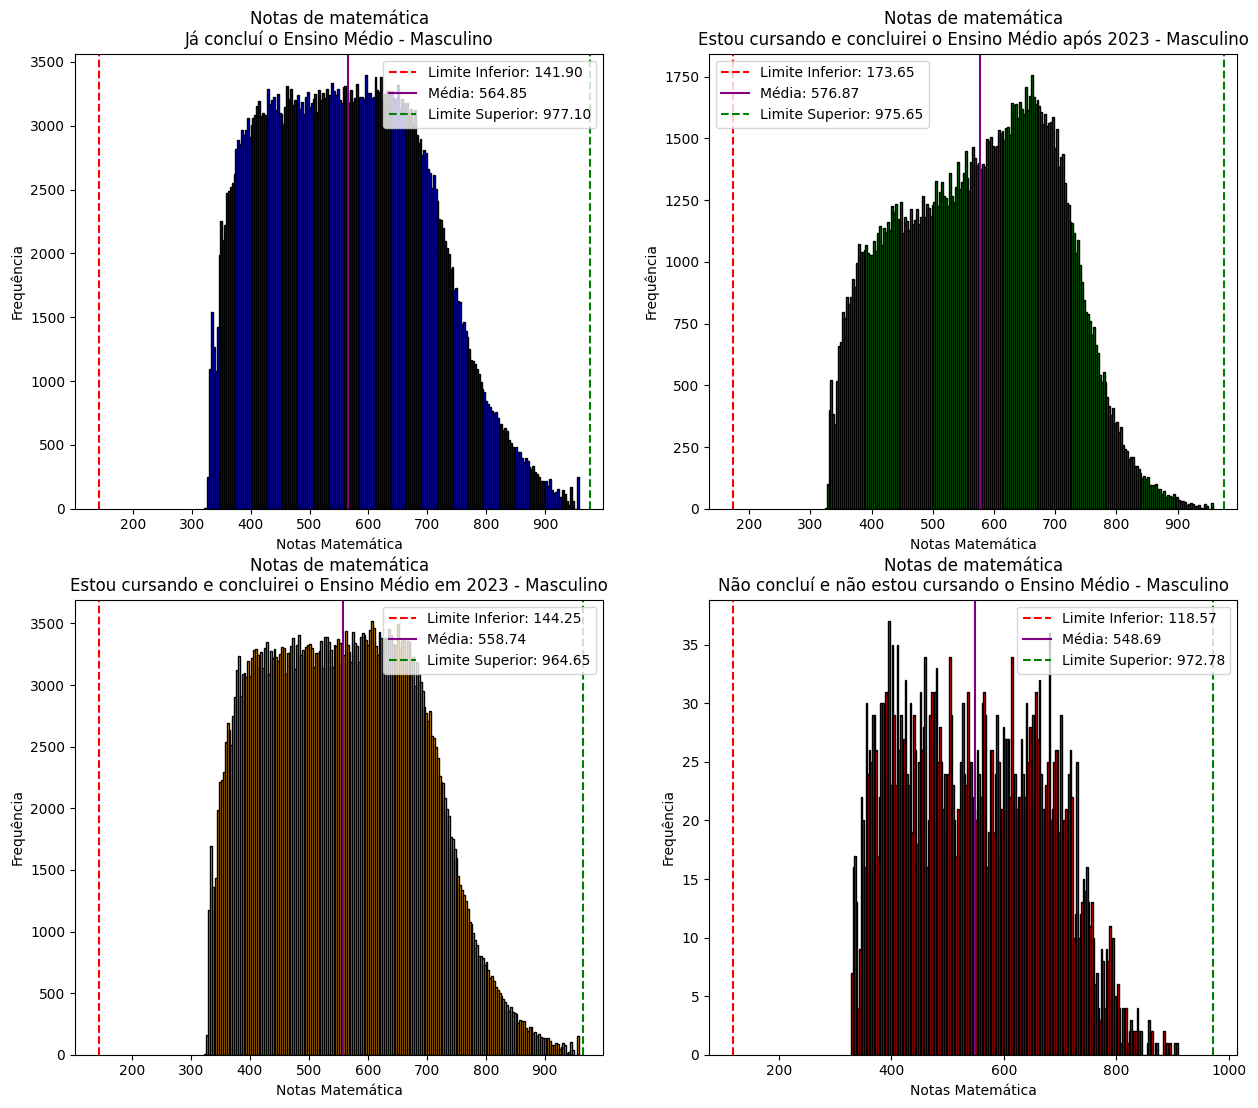

In [ ]:
plot_hist(category_comb_m, dict_m)

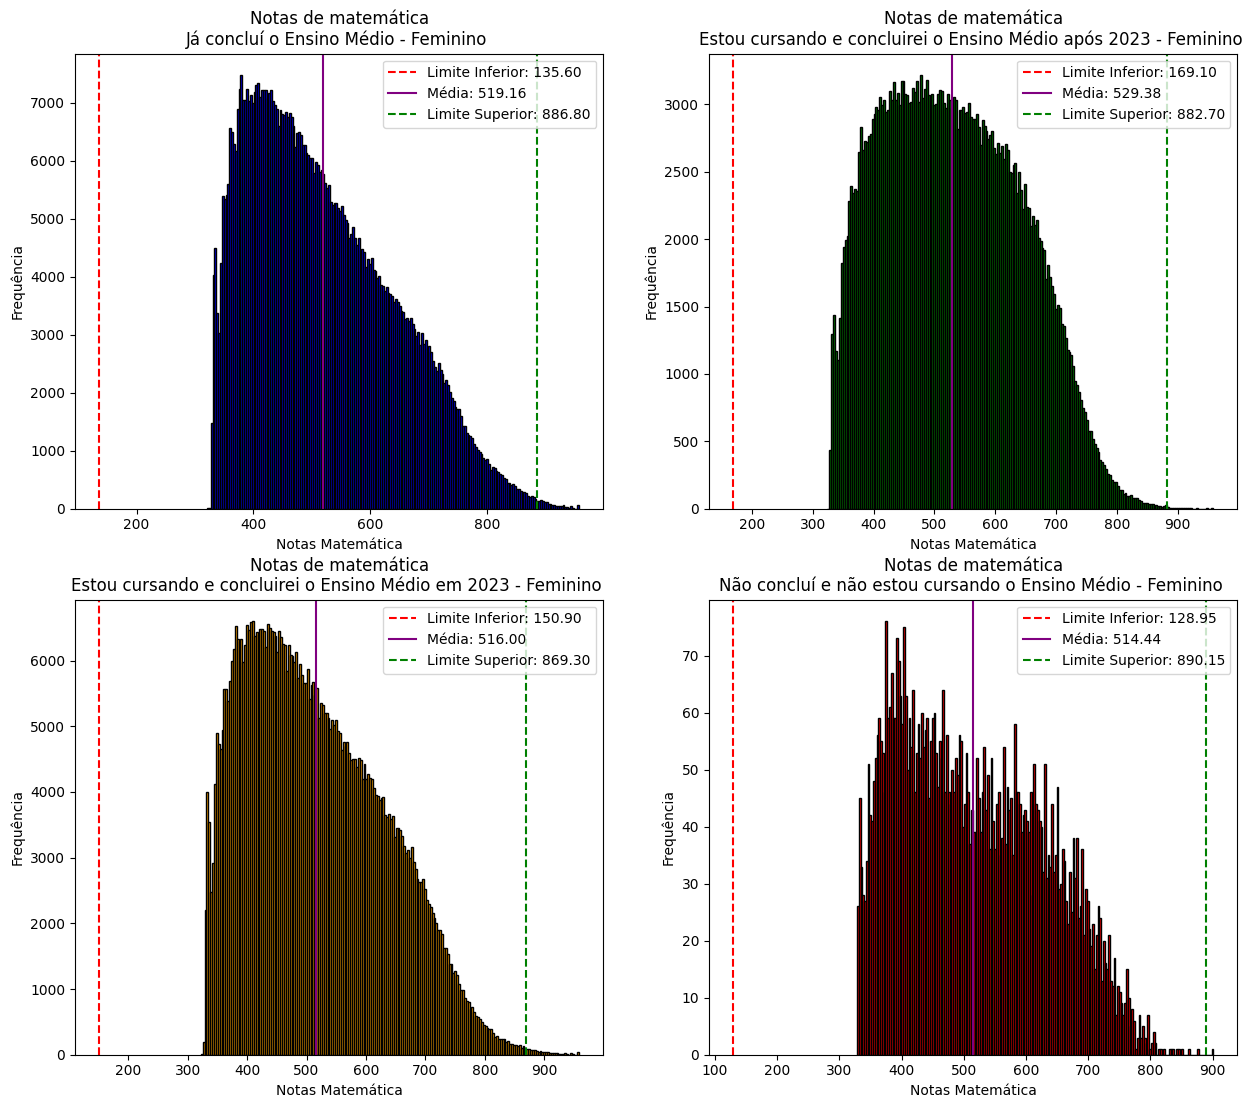

In [ ]:
plot_hist(category_comb_f, dict_f)